<a href="https://colab.research.google.com/github/ylabn/Bioinf_project10/blob/main/project_10_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from numpy import std, mean
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import pandas as pd
from google.colab import files
from keras.preprocessing import image
import io
from io import BytesIO
import requests
import numpy as np
from numpy import argmax
import time


In [7]:
#load the train and dataset 
def load_dataset():
  #load dataset
  (trainX, trainY),(testX, testY)=mnist.load_data() 
  #reshape dataset to have a single channel 
  trainX= trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX= testX.reshape((testX.shape[0], 28, 28, 1))
  #one hot encode target values
  trainY= to_categorical(trainY)
  testY= to_categorical(testY)
  return trainX, trainY, testX, testY


In [8]:
def prep_pixels(train, test):
  #convert from integers to floats
  train_norm= train.astype('float32')
  test_norm=test.astype('float32')
  #normalize to range 0-1
  train_norm= train_norm/255.0
  test_norm=test_norm/255.0
  #return normalized images
  return train_norm, test_norm
  

**I task= permutation with seed=1** 

*   learning rate 10-3
*   dropout NO
*   early stopping NO
*   n.hidden layers 400
*   width hidden layers 400
*   epochs/dataset 20






In [5]:
def permut(trainX, testX, seed):
  tf.random.set_seed(seed)
  np.random.seed(seed)
  rng = np.random.RandomState(seed)
  perm = rng.permutation(trainX.shape[1])
  trainX_perm = trainX[:, perm]
  testX_perm = testX[:, perm]
  return trainX_perm, testX_perm

In [ ]:
#define cnn model:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer= 'he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  #compile model 
  opt=SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
#evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories= list(), list()
  #prepare cross validation
  kfold=KFold(n_folds, shuffle=True, random_state=1)
  #enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    #define model
    model=define_model()
    #select rows for train and test
    trainX, trainY, testX, testY= dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix] 
    #fit model
    history= model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=0)
    #evaluate model
    _, acc= model.evaluate(testX, testY, verbose=0)
    print('> %.3f' %(acc * 100.0))
    #stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories 

In [ ]:
def summarize_diagnostic(histories):
  for i in range(len(histories)):
    #plot loss
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    #plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()  

In [ ]:
#summarize model performance
def summarize_performance(scores):
  #print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  #box and whisker plots of results
  plt.boxplot(scores)
  plt.show()

In [6]:
def run_first_task():
  #laod dataset 
  trainX, trainY, testX, testY= load_dataset()
  #prepare pixel data
  trainX, testX= prep_pixels(trainX, testX)
  trainX_I,testX_I= permut(trainX, testX, 1)

  plt.figure()
  plt.imshow(trainX[0].reshape(28,28))
  plt.figure()
  plt.imshow(trainX_I[0].reshape(28,28))

  #load model
  model= load_model('final_model.h5')
  model.summary()
  #evaluate model on test dataset
  _, acc= model.evaluate(testX_I, testY, verbose=0)
  print('>%.3f' % (acc*100.0))

  ##define model
  #model=define_model()
  ##fit model 
  #model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
  ##save model
  #model.save('final_model.h5')
  


  ##evaluate model
  #scores, histories= evaluate_model(trainX, trainY)
  #histories.save('histories_task1')
  ##learning curves
  #summarize_diagnostic(histories)
  ##summarize estimated performance
  #summarize_performance(scores)
  
  return trainX, trainY, testX, testY
 

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 400)               2163600   
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 10)                40

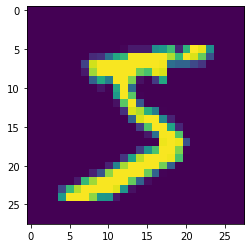

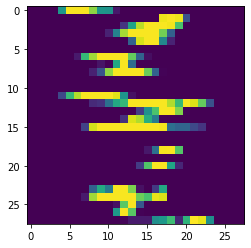

In [ ]:
trainX, trainY, testX, testY=run_first_task()

 **transfer learning --> train the network on II task**

In [ ]:
#creating the new dataset
trainX_II, testX_II= permut(trainX, testX, 2)
trainX_I, testX_I= permut(trainX, testX, 1)

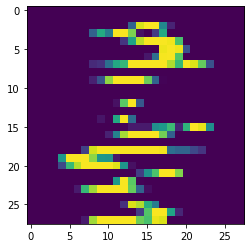

In [ ]:
plt.imshow(trainX_II[0].reshape(28,28))

> 98.317
> 98.317
> 98.475
> 98.625
> 98.433


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


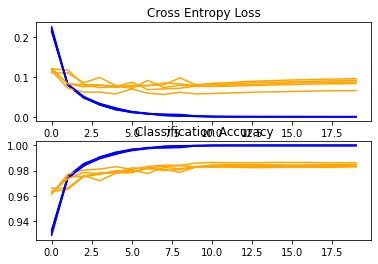

Accuracy: mean=98.433 std=0.115, n=5


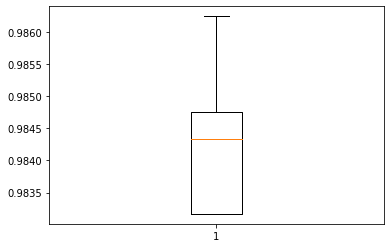

INFO:tensorflow:Assets written to: final_model.task2/assets


In [ ]:
#load model previously trained 
model=load_model('final_model.h5')

#compile model 
#opt=SGD(learning_rate=0.01, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#fit model 
model.fit(trainX_II, trainY, epochs=10, batch_size=32, verbose=0)

#evaluate model
scores, histories= evaluate_model(trainX_II, trainY)
#learning curves
summarize_diagnostic(histories)
#summarize estimated performance
summarize_performance(scores)

#save model
model.save('final_model.task2')




In [ ]:
#evaluate model on test
model=load_model('final_model.task2')
_, acc= model.evaluate(testX_II, testY, verbose=0)
print('>%.3f' % (acc*100.0))
time.sleep(2)
_, acc= model.evaluate(testX_I, testY, verbose=0)
print('>%.3f' % (acc*100.0))

OSError: ignored

 **Training on third task**

In [ ]:
#creating new dataset 
trainX_III, testX_III= permut(trainX, testX, 3)

In [ ]:
#load model previously trained 
model=load_model('final_model.task2')

#compile model 
#opt=SGD(learning_rate=0.01, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#fit model 
model.fit(trainX_III, trainY, epochs=10, batch_size=32, verbose=0)

#evaluate model
scores, histories= evaluate_model(trainX_III, trainY)
#learning curves
summarize_diagnostic(histories)
#summarize estimated performance
summarize_performance(scores)

#save model
model.save('final_model.task3')

OSError: ignored

In [ ]:
#evaluate model on test
model=load_model('final_model.task3')
_, acc= model.evaluate(testX_I, testY, verbose=0)
print('>%.3f' % (acc*100.0))
time.sleep(2)
_, acc= model.evaluate(testX_II, testY, verbose=0)
print('>%.3f' % (acc*100.0))
time.sleep(2)
_, acc= model.evaluate(testX_III, testY, verbose=0)
print('>%.3f' % (acc*100.0))

>51.640
>84.620
>98.620


**Reference figure tab1 3C**
I task= permutation with seed=1

*   learning rate 10-3
*   dropout NO
*   early stopping NO
*   n.hidden layers 6
*   width hidden layers 100
*   epochs/dataset 100



In [3]:
#define cnn model:
def define_model_3C():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer= 'he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  #compile model 
  opt=SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [4]:
#evaluate a model using k-fold cross-validation
def evaluate_model_3C(dataX, dataY, n_folds=5):
  scores, histories= list(), list()
  #prepare cross validation
  kfold=KFold(n_folds, shuffle=True, random_state=1)
  #enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    #define model
    model=define_model_3C()
    #select rows for train and test
    trainX, trainY, testX, testY= dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix] 
    #fit model
    history= model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    #evaluate model
    _, acc= model.evaluate(testX, testY, verbose=0)
    print('> %.3f' %(acc * 100.0))
    #stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories 

In [ ]:
print(scores)

[0.987583339214325, 0.9878333210945129, 0.987666666507721, 0.9885833263397217, 0.9881666898727417]


In [9]:
def run_first_task_3C():
  #laod dataset 
  trainX, trainY, testX, testY= load_dataset()
  #prepare pixel data
  trainX, testX= prep_pixels(trainX, testX)
  trainX_I,testX_I= permut(trainX, testX, 2)

  plt.figure()
  plt.imshow(trainX[0].reshape(28,28))
  plt.figure()
  plt.imshow(trainX_I[0].reshape(28,28))

  #load model
  #model= load_model('final_model.h5')
  #model.summary()
  #evaluate model on test dataset
  #_, acc= model.evaluate(testX_I, testY, verbose=0)
  #print('>%.3f' % (acc*100.0))

  #define model
  model=define_model_3C()
  ##fit model 
  model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=0)
  #save model
  model.save('final_model.3C')
  


  ##evaluate model
  scores, histories= evaluate_model_3C(trainX, trainY)
  

  ##learning curves
  summarize_diagnostic(histories)
  ##summarize estimated performance
  summarize_performance(scores)

  with open('scores_task1.txt','w') as f:
     f.write((str(scores)))

  with open('histories_task1.txt','w') as f:
     f.write((str(histories))) 
  
  return trainX, trainY, testX, testY, scores, histories

In [ ]:
trainX, trainY, testX, testY, scores, histories=run_first_task_3C()

11501568/11490434 [==============================] - 0s 0us/step
